# Removing Trends - Lab

## Introduction

In this lab, you'll practice your detrending skills!

## Objectives

You will be able to:
* Learn how to remove trends and seasonality
* Use a log transformation to minimize non-stationarity
* Use rolling means to reduce non-stationarity
* Use differencing to reduce non-stationarity

## Detrending the Airpassenger data

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import passengers.csv and set it as a time-series object. Plot the TS
df = pd.read_csv('passengers.csv')

## Create a stationarity check

At this stage, we can use the code from previous labs to create a function `stationarity_check(ts)` that takes in a time series object and performs stationarity checks including rolling statistics and the Dickey Fuller test. 

We want the output of the function to:
- Plot the original time series along with the rolling mean and rolling standard deviation in one plot
- Output the results of the Dickey-Fuller test

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month          144 non-null object
#Passengers    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [3]:
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
#Passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB


In [6]:
# Create a function to check for the stationarity of a given timeseries using rolling stats and DF test
# Collect and package the code from previous lab
def check_stationary(data):
    '''
    Checks if the data is stationary by using the rolling method in pands
    
    data: dataframe
    '''
    
    # create the mean and std for plotting
    mean = data.rolling(window=8, center=False).mean()
    std = data.rolling(window=8, center=False).std()
    
    #plot the mean and std
    plt.figure(figsize=(16,10))
    plt.plot(mean, label='Rolling Mean')
    plt.plot(std, label='Rolling Std')
    plt.title('Stationary Check')
    plt.xlabel('Dates')
    plt.legend(loc='best')
    plt.show()

Use your newly created function on the airpassenger data set.

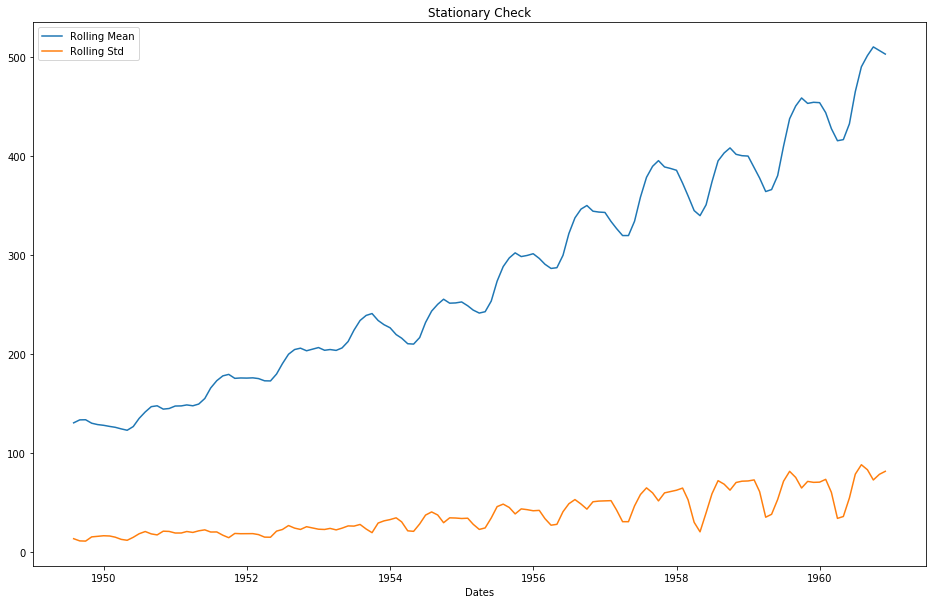

In [7]:
# Code here
check_stationary(df)

## Perform a log() and sqrt() transform

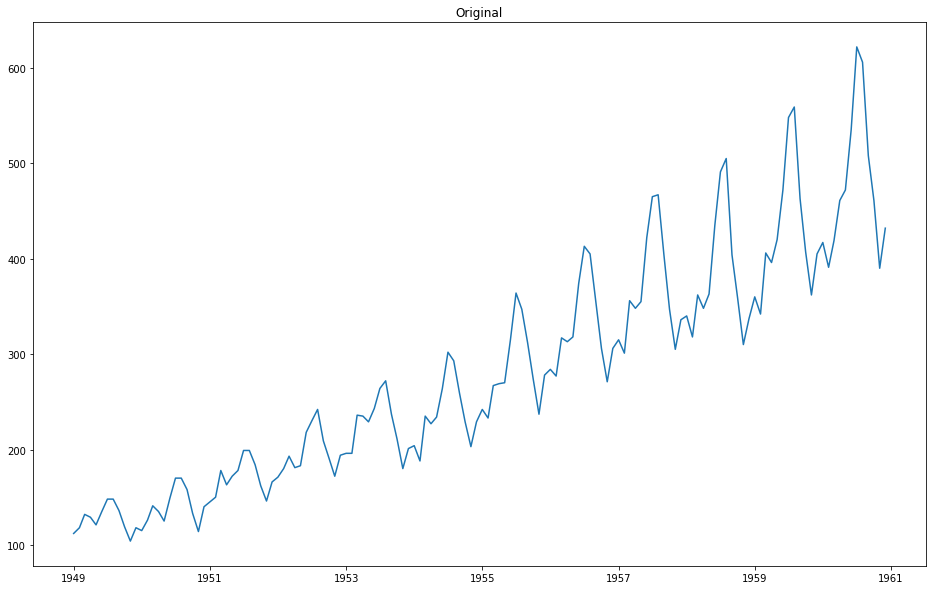

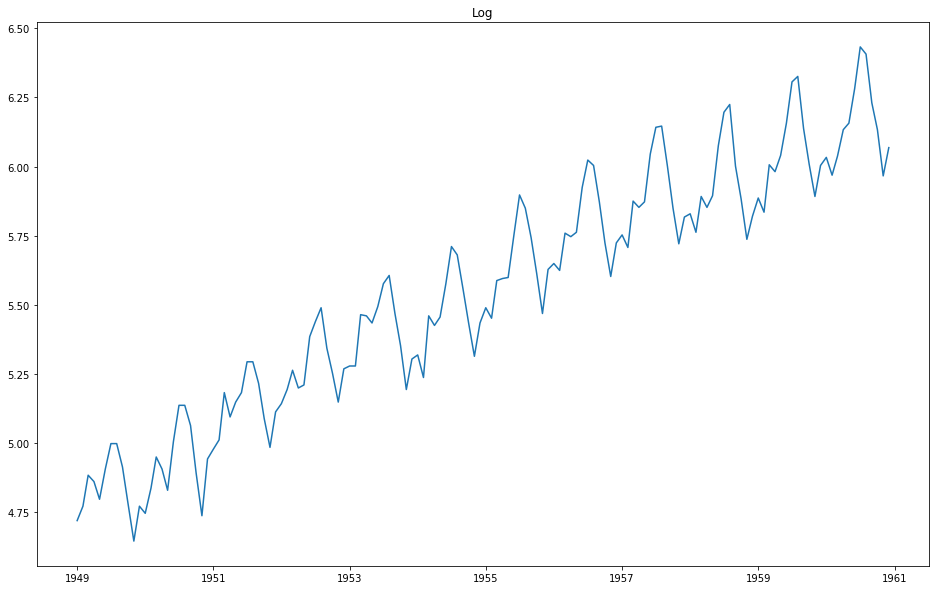

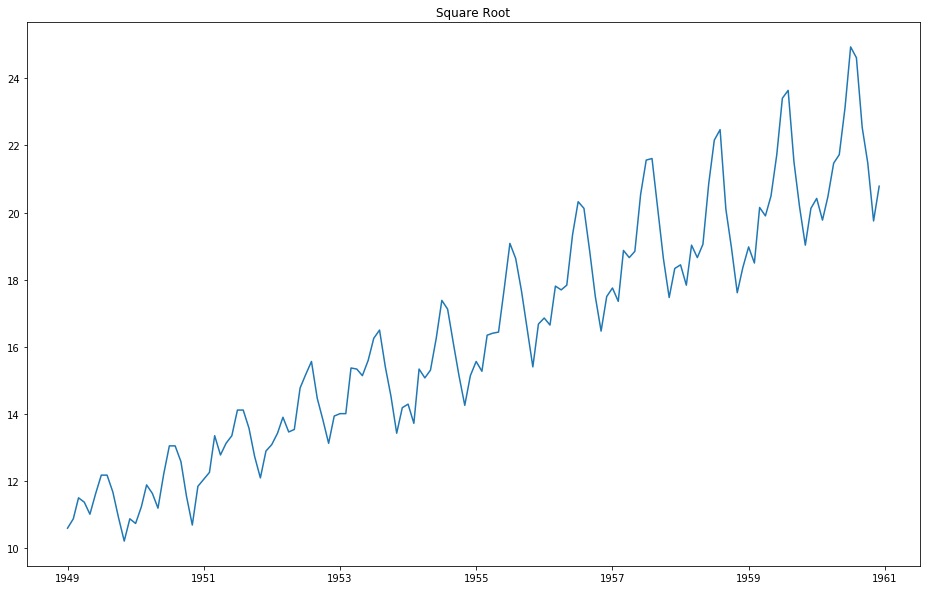

In [12]:
# Log transform timeseries and compare with original to check the effect
df_log = np.log(df)
df_sqrt = np.sqrt(df)

# original
plt.figure(figsize=(16, 10))
plt.plot(df)
plt.title('Original')
plt.show()

# log
plt.figure(figsize=(16, 10))
plt.plot(df_log)
plt.title('Log')
plt.show()

# sqrt
plt.figure(figsize=(16, 10))
plt.plot(df_sqrt)
plt.title('Square Root')
plt.show()

moving forward, let's keep working with the log transformed data before subtracting rolling mean, differencing, etc.

## Subtracting the rolling mean

Create a rolling mean using your log transformed time series, with a time window of 7. Plot the log-transformed time series and the rolling mean together.

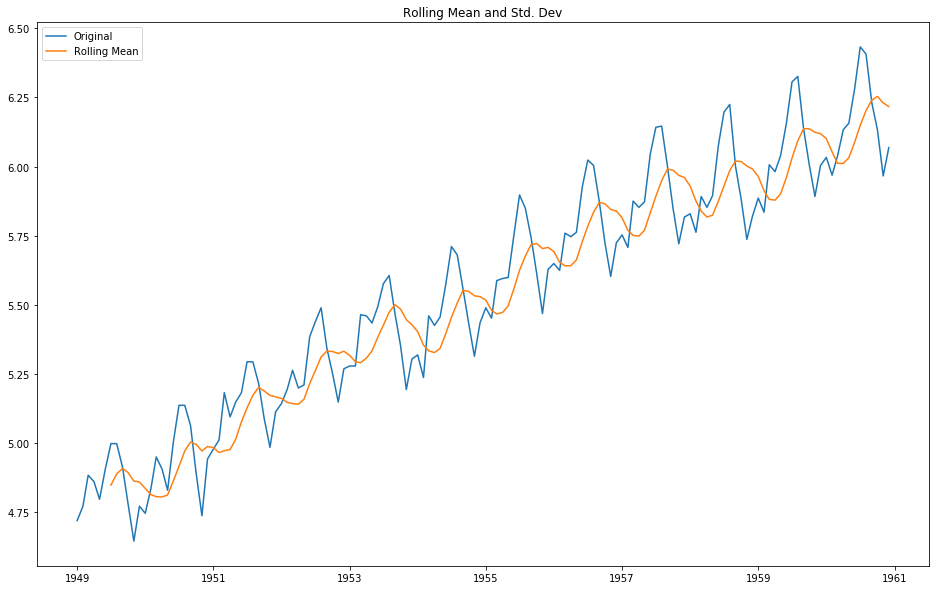

In [14]:
# your code here
rolling_mean = df_log.rolling(window=7, center=False).mean()
plt.figure(figsize=(16, 10))
plt.plot(df_log, label='Original')
plt.plot(rolling_mean, label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean and Std. Dev')
plt.show()

Now, subtract the rolling mean from the time series, look at the 10 first elements of the result and plot the result.

In [16]:
# Subtract the moving average from the original data and check head for Nans
data_minus_rolmean = np.log(df).sub(rolling_mean)
data_minus_rolmean.head(10)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,0.150059
1949-08-01,0.110242
1949-09-01,0.005404


In [18]:
# Drop the NaN values from timeseries calculated above
data_minus_rolmean.dropna(inplace=True)

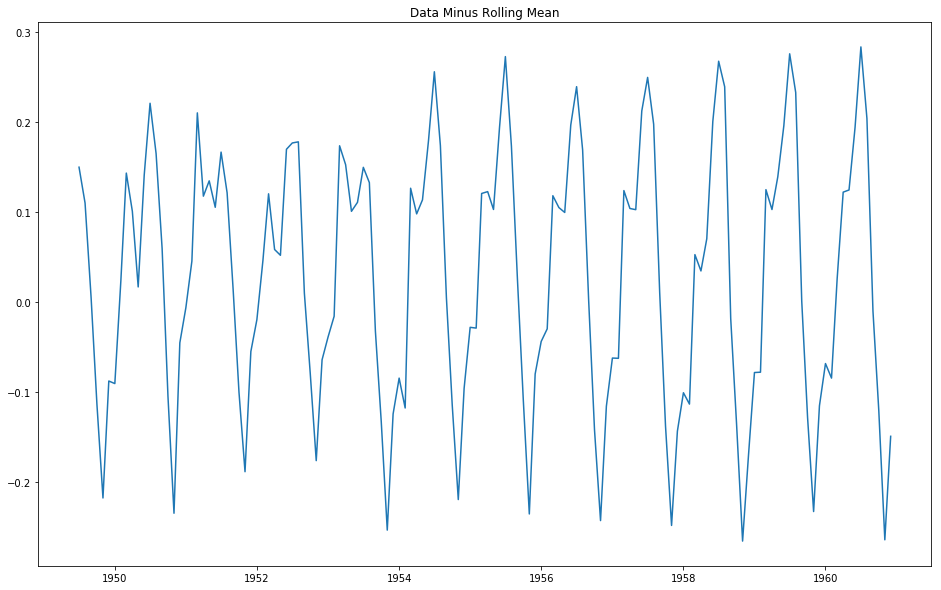

In [19]:
# Plot the result
plt.figure(figsize=(16, 10))
plt.plot(data_minus_rolmean)
plt.title('Data Minus Rolling Mean')
plt.show()

Finally, use your function `check_stationarity` to see if this series is considered stationary!

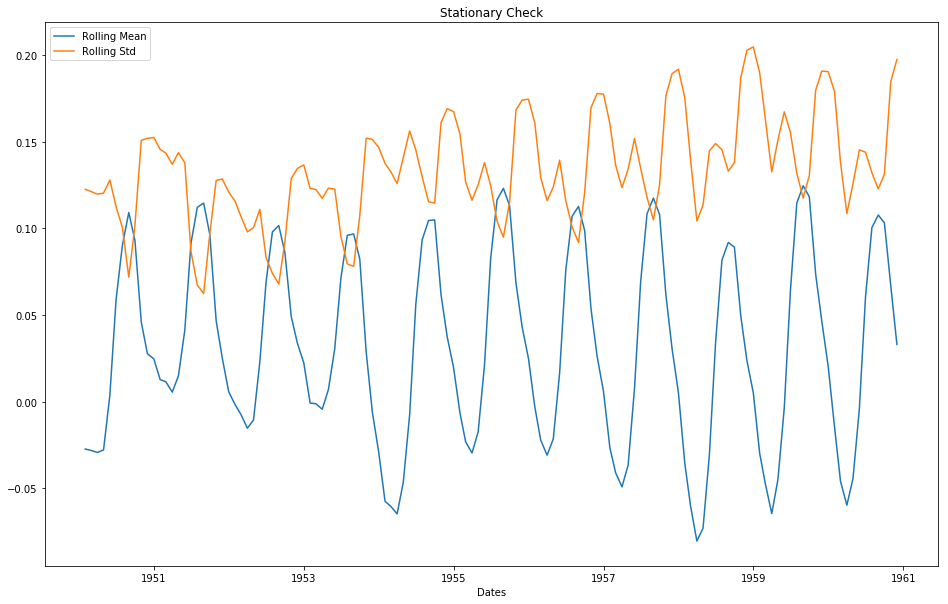

In [20]:
# Your code here
check_stationary(data_minus_rolmean)

### Based on the visuals and on the Dickey-Fuller test, what do you conclude?


## Subtracting the weighted rolling mean

Repeat all the above for the *weighter* rolling mean. Start from the log-transformed data again. Compare the Dickey-Fuller Test results. What do you conclude?

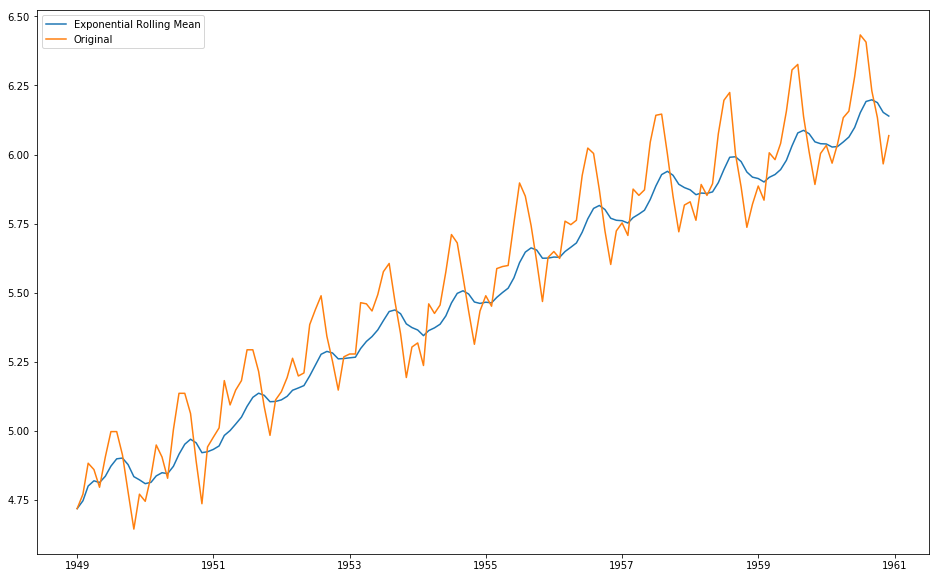

In [21]:
# Use Pandas ewma() to calculate Weighted Moving Average of ts_log
exp_rolmean = np.log(df).ewm(halflife = 4).mean()

# Plot the original data with exp weighted average
plt.figure(figsize=(16, 10))
plt.plot(exp_rolmean, label='Exponential Rolling Mean')
plt.plot(df_log, label='Original')
plt.legend(loc='best')
plt.show()

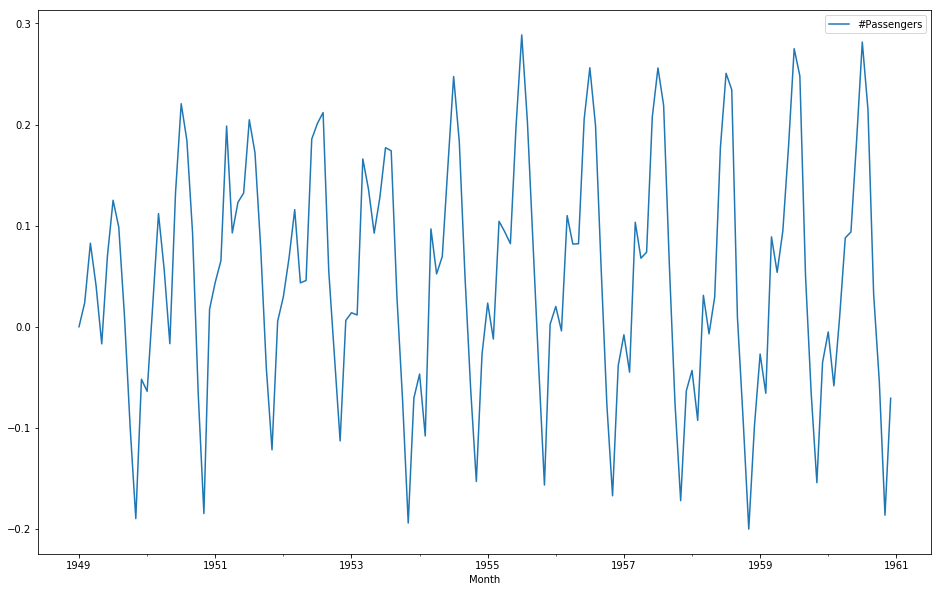

In [22]:
# Subtract the moving average from the original data and plot
data_minus_expmean = df_log.sub(exp_rolmean)
data_minus_expmean.head()
data_minus_expmean.plot(figsize=(16,10))

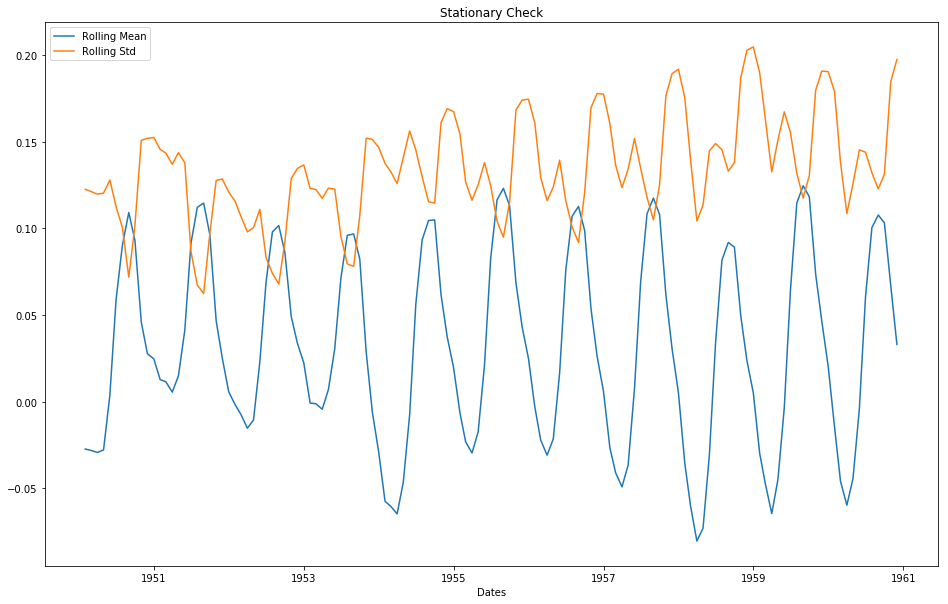

In [23]:
# do a stationarity check
check_stationary(data_minus_rolmean)

### Based on the visuals and on the Dickey-Fuller test, what do you conclude?


## Differencing

Using exponentially weighted moving averages, we seem to have removed the upward trend, but not the seasonality issue. Now use differencing to remove seasonality. Make sure you use the right amount of `periods`. Start from the log-transformed, exponentially weighted rolling mean-subtracted series.

After you differenced the series, run the `stationarity check` again.

In [25]:
# difference your data and look at the head
data_diff = data_minus_rolmean.diff(periods=12)
data_diff.head(15)

,#Passengers
Month,
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN
1949-10-01,NaN
1949-11-01,NaN
1949-12-01,NaN
1950-01-01,NaN
1950-02-01,NaN
1950-03-01,NaN


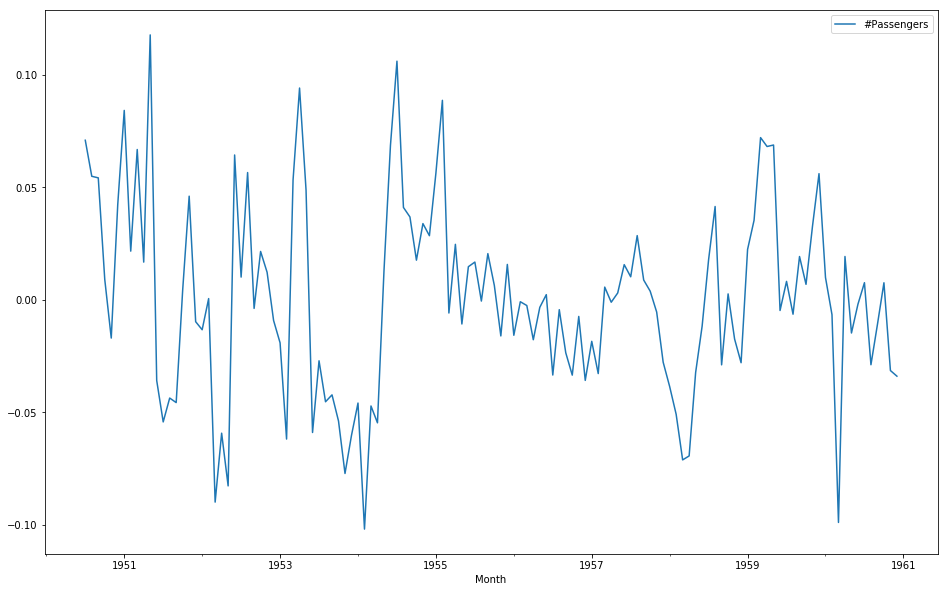

In [26]:
# plot your differenced time series
data_diff.plot(figsize=(16, 10))

In [27]:
# drop nas
data_diff.dropna(inplace=True)

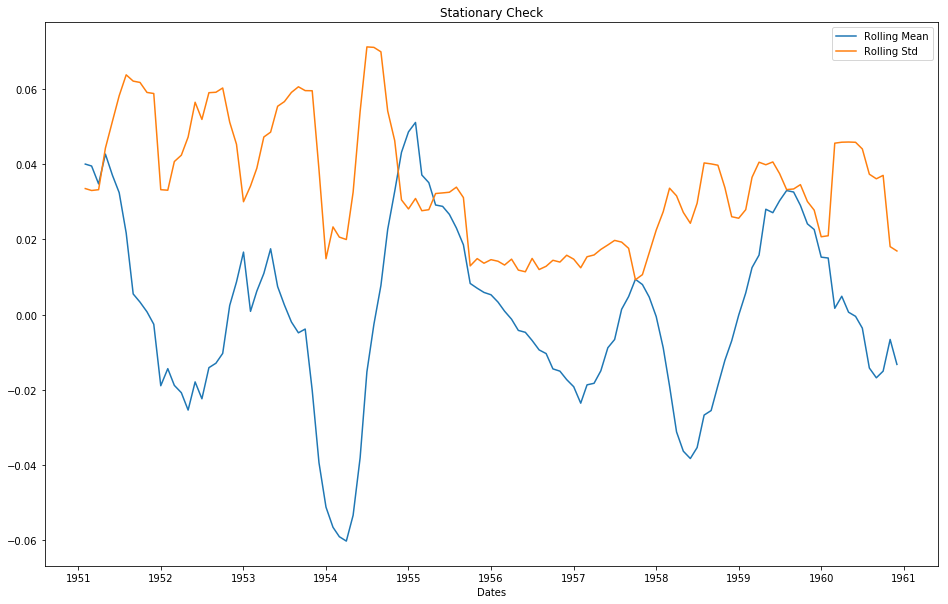

In [28]:
# perform the stationarity check
check_stationary(data_diff)

### Your conclusion

## Summary 

In this lab, you learned how to make time series stationary through using log transforms, rolling means and differencing.